# 03  Early Warning Risk Signals

## Objective
The goal of this notebook is to identify early-warning signals
that indicate rising market stress before large drawdowns occur.

These signals are designed to be:
- Interpretable
- Data-driven
- Non-predictive (risk detection, not forecasting)

## Input Data
- BTC daily price data with drawdown and crash regimes
(from 02_crash_definition.ipynb)


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("btc_daily.csv", index_col="date", parse_dates=True)

In [103]:
df['rolling_peak'] = df['close'].cummax()
df['drawdown'] = (df['close'] - df['rolling_peak']) / df['rolling_peak']

Before crashes:

-Panic selling increases

-Volume spikes relative to normal levels

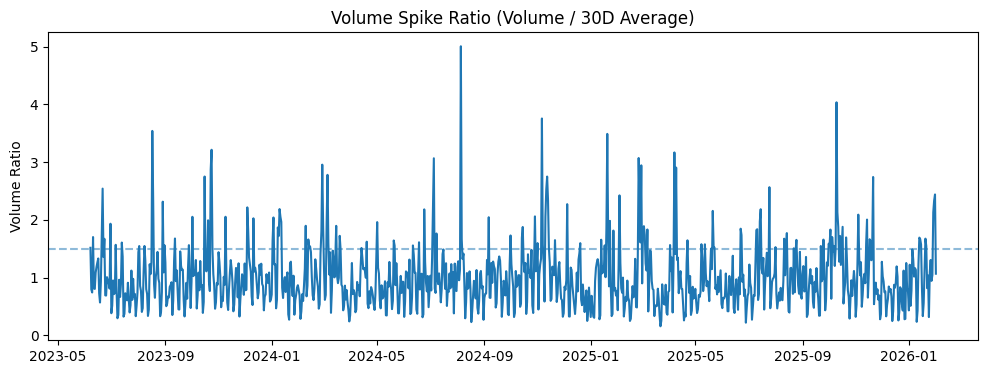

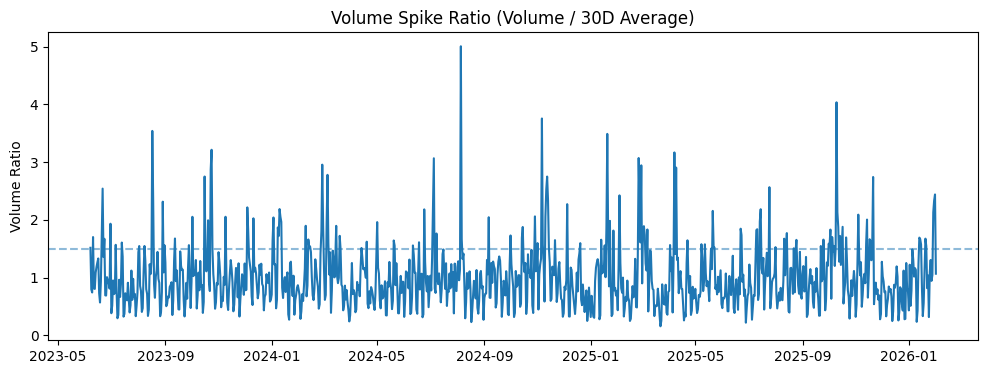

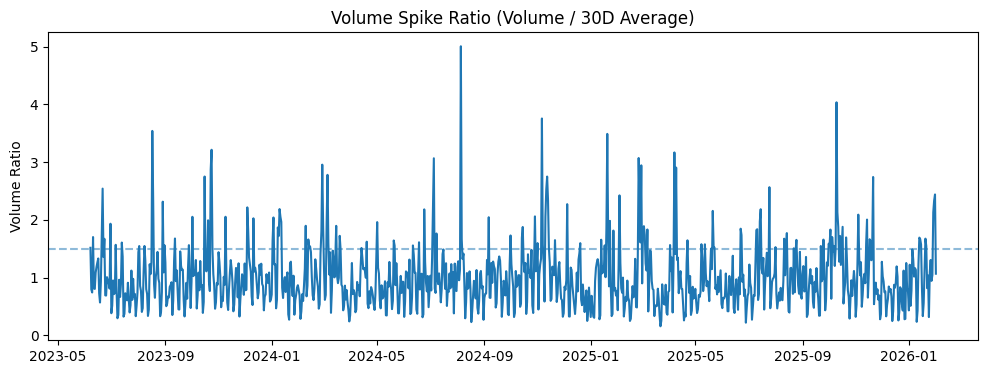

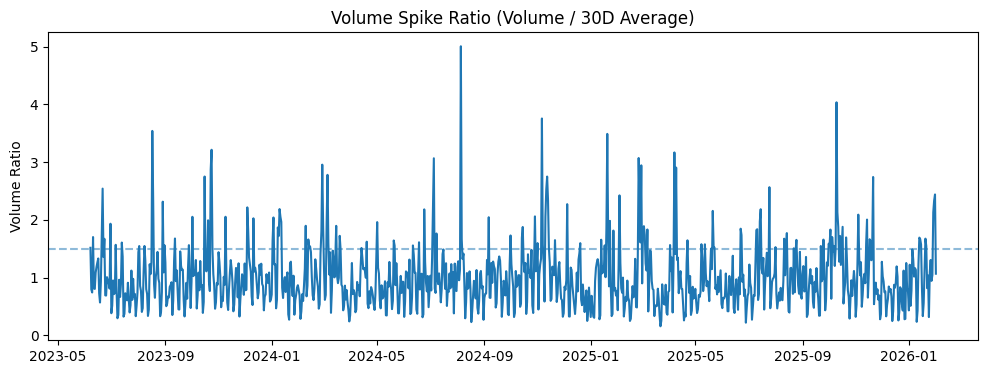

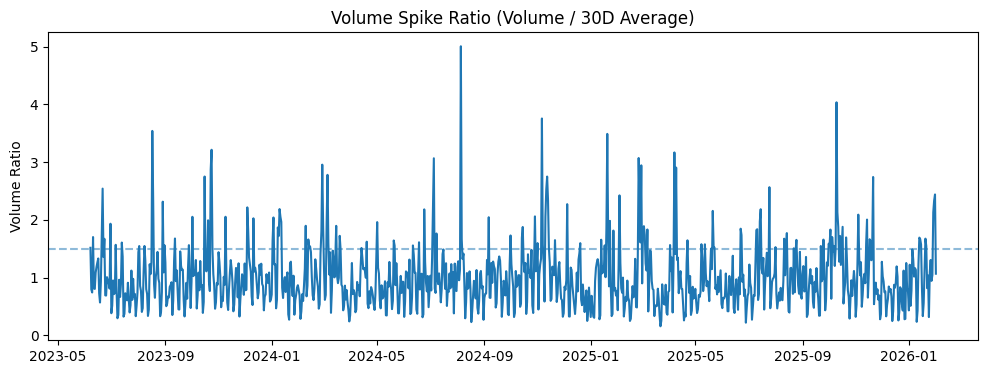

In [104]:
df['volume_ma'] = df['volume'].rolling(30).mean()
df['volume_ratio'] = df['volume'] / df['volume_ma']
plt.figure(figsize=(12,4))
plt.plot(df.index, df['volume_ratio'])
plt.axhline(1.5, linestyle='--', alpha=0.5)
plt.title("Volume Spike Ratio (Volume / 30D Average)")
plt.ylabel("Volume Ratio")
plt.show()

Volume spikes above normal levels often indicate panic-driven activity.
Sustained elevated volume can signal distribution before major drawdowns.


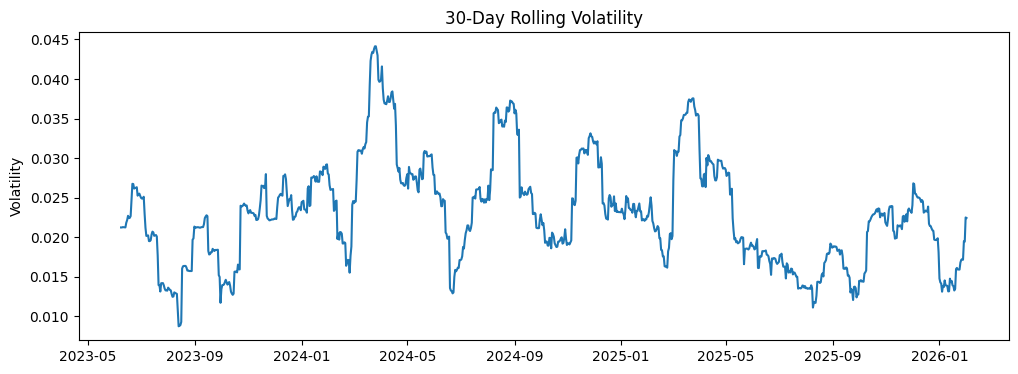

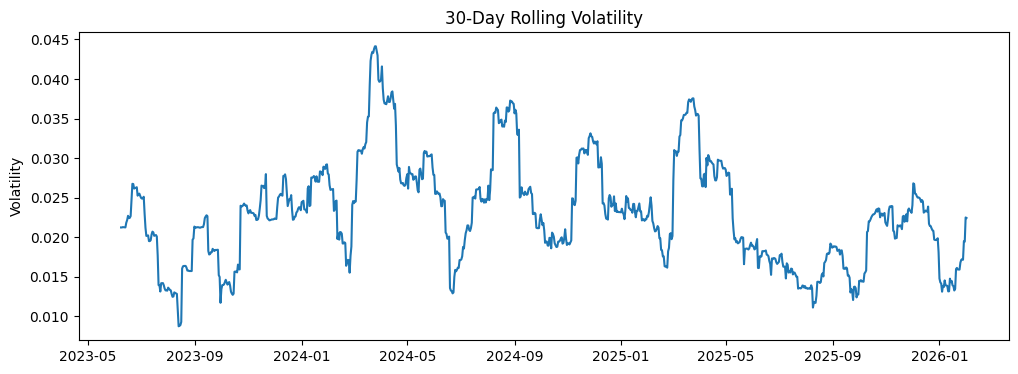

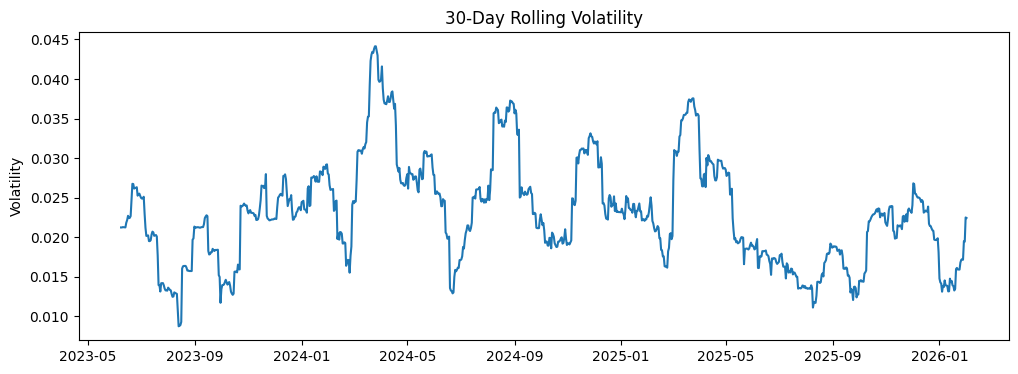

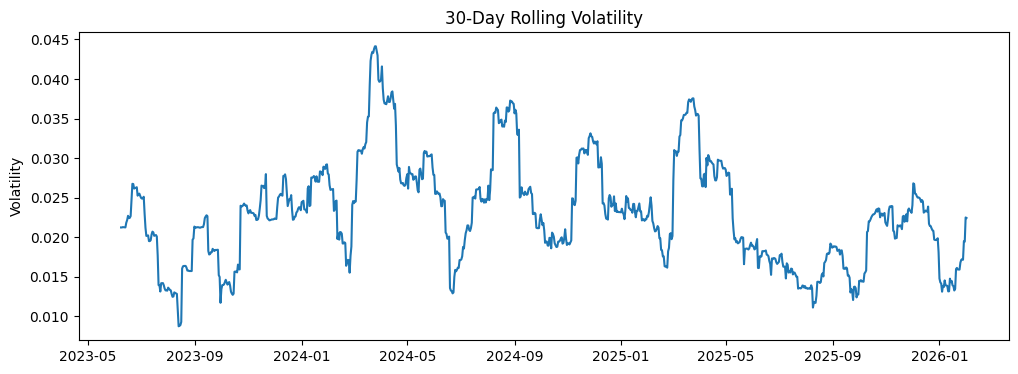

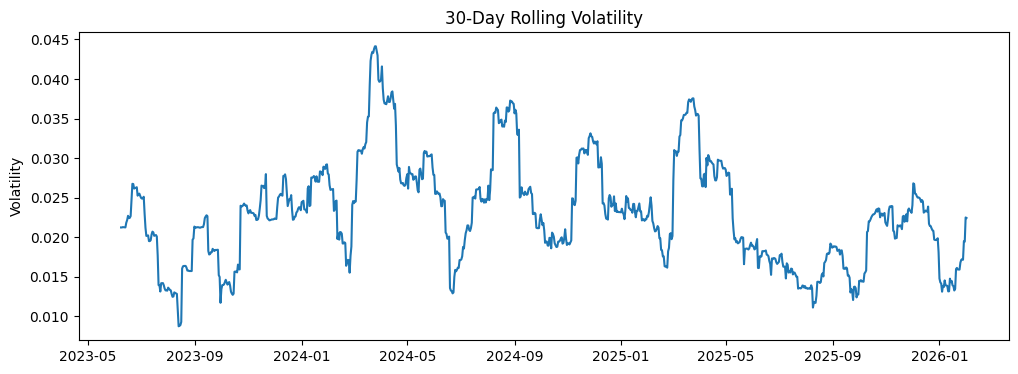

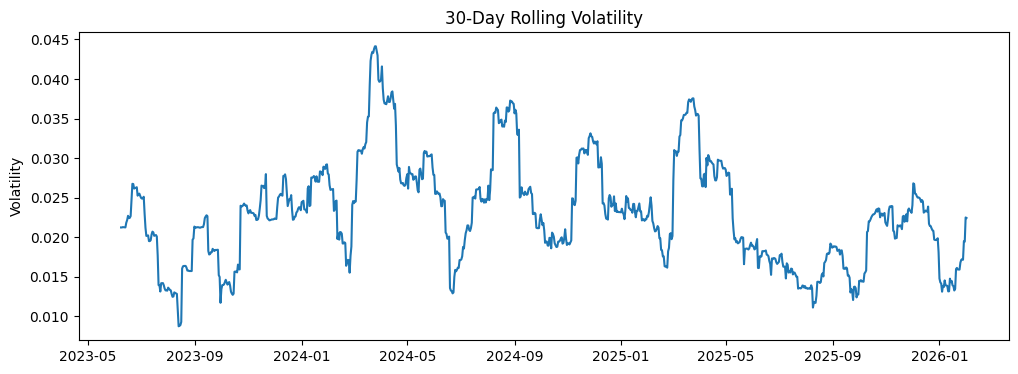

In [98]:
df['returns'] = df['close'].pct_change()
df['volatility_30d'] = df['returns'].rolling(30).std()
plt.figure(figsize=(12,4))
plt.plot(df.index, df['volatility_30d'])
plt.title("30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

Rising volatility reflects increasing uncertainty.
Sharp volatility expansion often coincides with the transition
from stable markets to stress regimes.


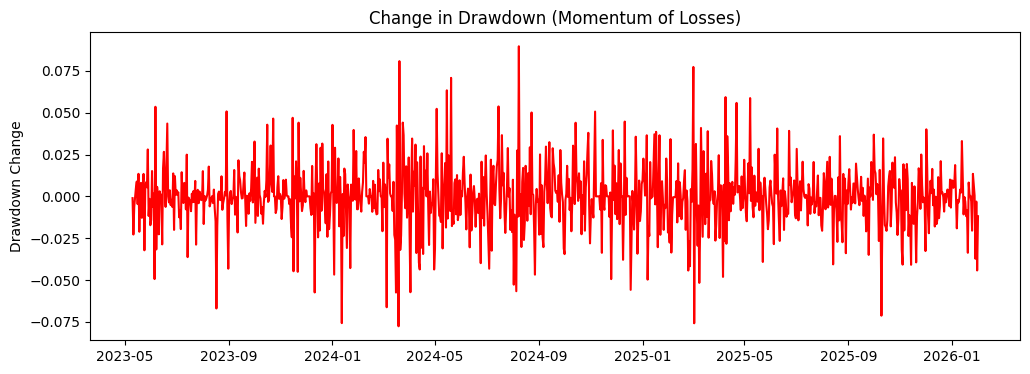

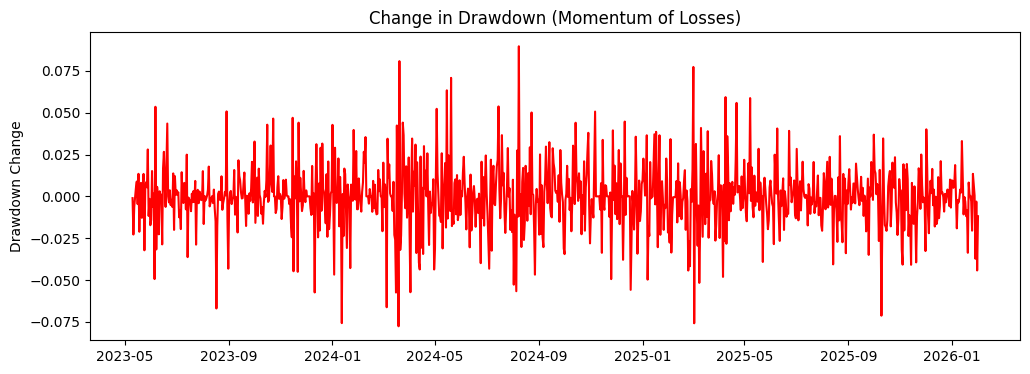

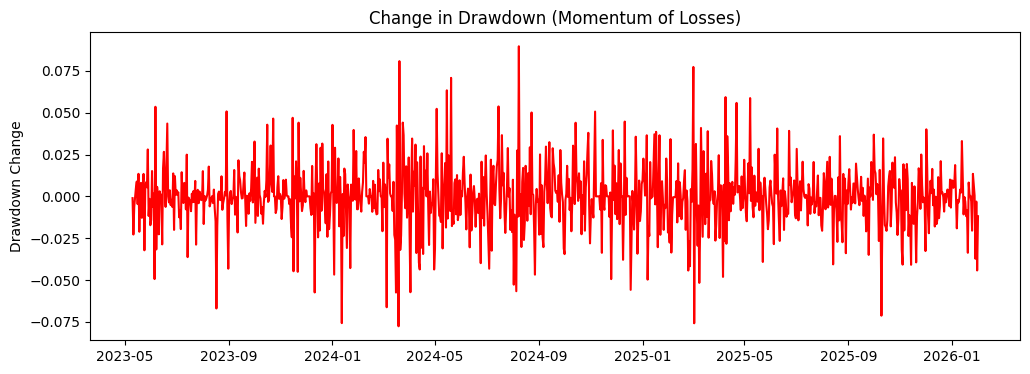

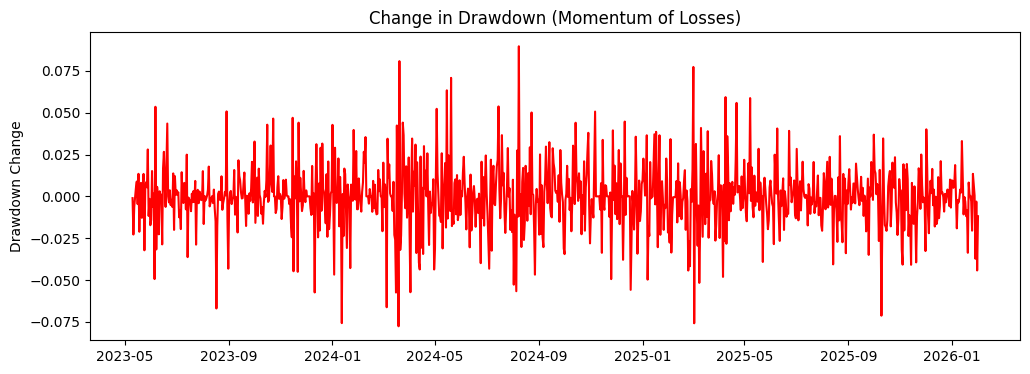

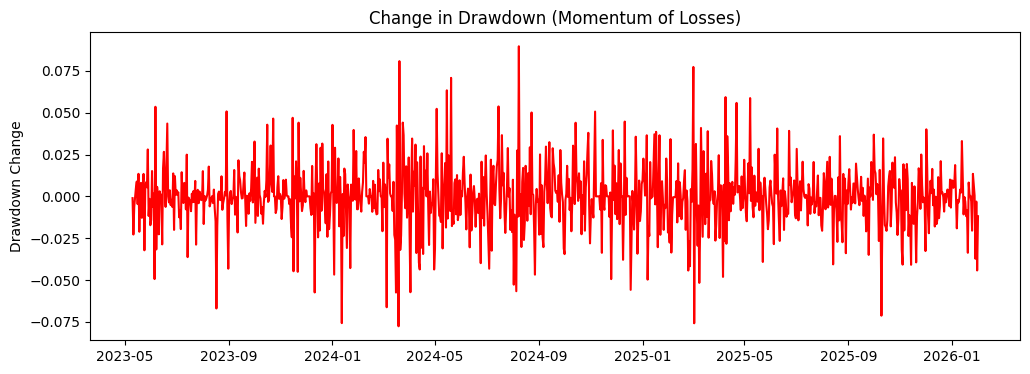

In [101]:
df['drawdown_change'] = df['drawdown'].diff()
plt.figure(figsize=(12,4))
plt.plot(df.index, df['drawdown_change'], color='red')
plt.title("Change in Drawdown (Momentum of Losses)")
plt.ylabel("Drawdown Change")
plt.show()

Accelerating drawdowns indicate increasing downside momentum.
This often signals a transition from mild stress into crash regimes.

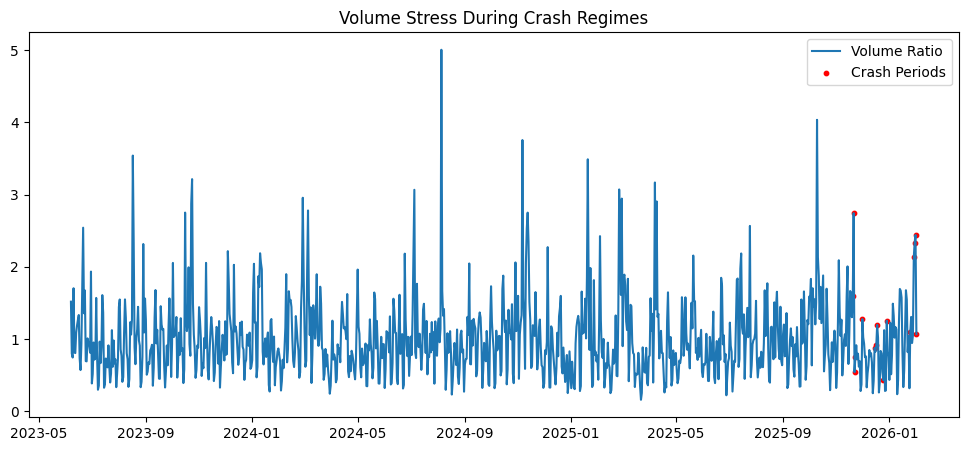

In [90]:
crash_periods = df[df['drawdown'] <= -0.3]

plt.figure(figsize=(12,5))
plt.plot(df.index, df['volume_ratio'], label="Volume Ratio")
plt.scatter(crash_periods.index,df.loc[crash_periods.index, 'volume_ratio'],
            color='red', s=10, label="Crash Periods")
plt.legend()
plt.title("Volume Stress During Crash Regimes")
plt.show()

## Interim Observations

- Volume spikes tend to appear during periods of increasing drawdown
- Volatility expands as markets transition from calm to stress
- Accelerating drawdowns provide strong confirmation of regime change

These signals are not predictive on their own,
but together they help characterize rising market risk.
